# RQ2 Analysis
Research Question: Are there high amounts of PFPeA in Ann Arbor drinking water?

In [1]:
#load in libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load in data
url_download ='https://docs.google.com/spreadsheets/d/14Mv-sjV11S3HSy_TzdUefWglVw4anyczpWllNfTwGls/gviz/tq?tqx=out:csv'
water_data = pd.read_csv(url_download, encoding='utf-8')
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample Date                  147 non-null    object 
 1   PFBA (ppt)                   147 non-null    object 
 2   PFPeA (ppt)                  71 non-null     float64
 3   PFBS (ppt)                   147 non-null    object 
 4   PFHxA (ppt)                  147 non-null    object 
 5   PFHpA (ppt)                  104 non-null    float64
 6   PFHxS (ppt)                  147 non-null    object 
 7   PFOA (ppt)                   147 non-null    object 
 8   PFNA (ppt)                   147 non-null    object 
 9   PFOS (ppt)                   147 non-null    object 
 10  6:2 FTS (ppt)                147 non-null    object 
 11  Sum of PFOS and  PFOA (ppt)  147 non-null    object 
 12  Sum of All PFAS  (ppt)       147 non-null    float64
dtypes: float64(3), objec

In [3]:
#remove whitespace from column names
water_data.columns = [col.strip() for col in water_data.columns]
water_data.columns = [col.replace('\xa0','') for col in water_data.columns]
water_data.columns = [col.replace(' ','') for col in water_data.columns]

Now that the data column names have been cleaned, we will take a look at what the data looks like.

In [4]:
#show data
water_data

,SampleDate,PFBA(ppt),PFPeA(ppt),PFBS(ppt),PFHxA(ppt),PFHpA(ppt),PFHxS(ppt),PFOA(ppt),PFNA(ppt),PFOS(ppt),6:2FTS(ppt),SumofPFOSandPFOA(ppt),SumofAllPFAS(ppt)
0,04/19/23,Not measured,NaN,Not detected,Not detected,NaN,Not detected,Not detected,Not detected,Not detected,Not measured,0,0.0
1,04/05/23,Not detected,2.9,Not detected,Not detected,NaN,Not detected,Not detected,Not detected,Not detected,Not detected,0,2.9
2,03/21/23,Not detected,3.2,Not detected,Not detected,NaN,Not detected,Not detected,Not detected,Not detected,Not detected,0,3.2
3,03/07/23,Not detected,5.1,Not detected,2.6,2.5,Not detected,Not detected,Not detected,Not detected,Not detected,0,10.2
4,02/01/23,5.2,6.1,Not detected,3.8,4.7,Not detected,Not detected,Not detected,Not detected,2.2,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,11/08/16,Not measured,NaN,Not measured,Not measured,NaN,Not measured,Not detected,Not measured,8.1,Not measured,8.1,8.1
143,10/05/16,Not measured,NaN,5.3,Not measured,4.8,Not detected,Not detected,Not detected,7.1,Not measured,7.1,17.2
144,07/21/16,Not measured,NaN,9.2,Not measured,5.3,Not detected,3,Not detected,16,Not measured,19.0,33.5
145,03/28/16,Not measured,NaN,Not detected,Not measured,2.1,Not detected,Not detected,Not detected,11,Not measured,11.0,13.1


We only need the column pertaining to PFPeA data, so we will isolate this column data to analyze.

In [5]:
#get PFOS column
pfpea_data = water_data['PFPeA(ppt)']
pfpea_data

0      NaN
1      2.9
2      3.2
3      5.1
4      6.1
      ... 
142    NaN
143    NaN
144    NaN
145    NaN
146    NaN
Name: PFPeA(ppt), Length: 147, dtype: float64

There are no "Not Measured" or "Not detected" values like in other columns, so we will not consider them. There are many NaN values, and looking at the original data set, they all represent "Not measured" values, so we can remove them, as they contain no valuable information.

In [6]:
#remove NaN values
pfpea_data = pfpea_data.dropna()

#make data a list to make analysis easier
pfpea_data = list(pfpea_data)

#show data
pfpea_data

[2.9,
 3.2,
 5.1,
 6.1,
 6.9,
 8.3,
 8.5,
 7.8,
 8.4,
 9.5,
 8.4,
 9.9,
 8.7,
 8.1,
 5.5,
 5.3,
 5.6,
 4.7,
 3.1,
 3.3,
 2.8,
 4.1,
 4.3,
 4.6,
 4.6,
 5.4,
 5.6,
 7.2,
 8.6,
 11.0,
 12.0,
 11.0,
 9.0,
 8.7,
 6.6,
 6.7,
 7.6,
 6.8,
 8.3,
 8.5,
 12.0,
 13.0,
 13.0,
 11.0,
 11.0,
 8.9,
 8.2,
 5.1,
 4.2,
 10.0,
 7.7,
 5.9,
 6.8,
 4.7,
 6.1,
 4.7,
 3.8,
 4.7,
 1.9,
 2.0,
 3.3,
 6.4,
 4.3,
 5.2,
 7.5,
 5.3,
 6.3,
 11.0,
 14.0,
 20.0,
 4.6]

Now, we can look at the distribution of the measurements to get an idea of what data the observations are showing. This will also give an idea of how many dangerous amounts of PFOS are present in the data, as well as how concerned experts may need to be about PFOS presence in Ann Arbor. This will include the mean, standard deviation, minimum and maximum values.

In [7]:
print('Minimum:', min(pfpea_data))
print('Mean:', np.mean(pfpea_data))
print('Standard Deviation:', np.std(pfpea_data))
print('Maximum:', max(pfpea_data))
print('Most of the data will be within 2 standard deviations of the mean. This means that most data will be between',
      max(min(pfpea_data), np.mean(pfpea_data) - 2 * np.std(pfpea_data)), 'and', np.mean(pfpea_data) + 2 * np.std(pfpea_data), 'ppt.')

Minimum: 1.9
Mean: 7.116901408450706
Standard Deviation: 3.197401494060977
Maximum: 20.0
Most of the data will be within 2 standard deviations of the mean. This means that most data will be between 1.9 and 13.51170439657266 ppt.


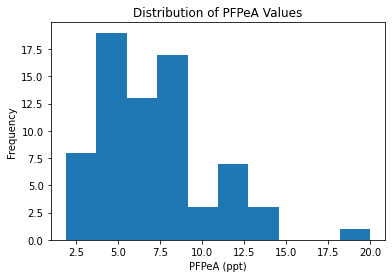

In [8]:
#get sorted values 
pfpea_sorted = pfpea_data
pfpea_sorted.sort()

#plot the distribution
plt.hist(pfpea_sorted)
plt.title('Distribution of PFPeA Values')
plt.xlabel('PFPeA (ppt)')
plt.ylabel('Frequency')
plt.show()

The values look to be very high, and most values exceed 1 ppt. The minimum exceeds the EWG health guideline, and the distribution is centered at 7.1, over 6 ppt over the guideline. There is also a slight right skew on the histogram, showing that there are a few much larger values that appear in the data.

We will once again visualize PFPeA with a linear regression line to evaluate the rate at which its presence is increasing, decreasing, or otherwise fluctuating.

In [9]:
#tidy PFPeA data in the water_data dataframe

#drop NaN values
for val in water_data['PFPeA(ppt)']:
    if val == None:
        water_data['PFPeA(ppt)'][val] = -1
        
water_data = water_data[water_data['PFPeA(ppt)'] >= 0]

#make values floats to make analysis easier
water_data['PFPeA(ppt)'] = water_data['PFPeA(ppt)'].astype(float)

#reverse data so that earlier observations are at the beginning and later observations are at the end
water_data = water_data.loc[::-1]
water_data.index = range(len(water_data['PFPeA(ppt)']))

/tmp/ipykernel_77/1861419938.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_data['PFPeA(ppt)'] = water_data['PFPeA(ppt)'].astype(float)


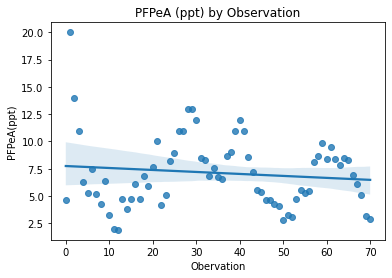

In [10]:
#plot PFPeA with a linear regression line
sns.regplot(x=water_data.index, y='PFPeA(ppt)', data=water_data)
plt.title('PFPeA (ppt) by Observation')
plt.xlabel('Obervation')
plt.show()

PFPeA values seem to fluctuate around 7.5 ppt. There were a few very large values in the first few observations that reach up to 20 ppt, then values alternate between increasing and decreasing within roughly 5 ppt of the linear regression line. We can also plot values without the possible outlier of 20 ppt to see how the line is affected.

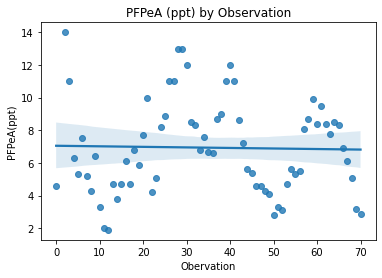

In [11]:
#plot a linear regression line without the maximum value
water_data = water_data[water_data['PFPeA(ppt)'] < 20]
sns.regplot(x=water_data.index, y='PFPeA(ppt)', data=water_data)
plt.title('PFPeA (ppt) by Observation')
plt.xlabel('Obervation')
plt.show()